# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [9]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [10]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

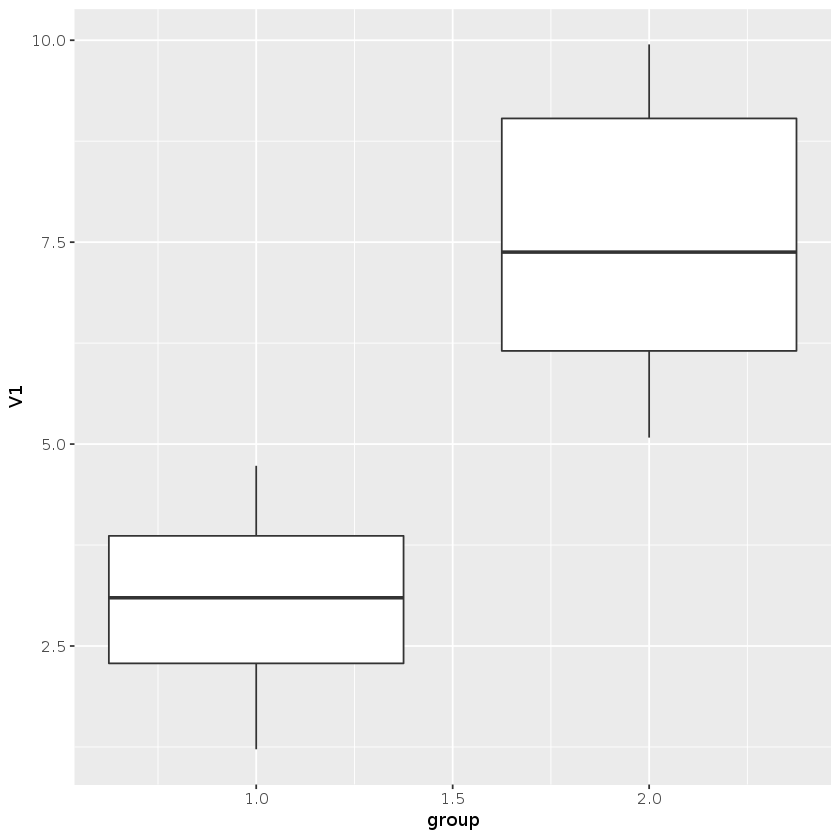

In [11]:
ggplot(df1, aes(x = group, y = V1, group = ifelse(V1 <= 5, 1, 2))) + geom_boxplot()

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [12]:
reg1 <- lm(group ~ V1, data = df1)
summary(reg1)


Call:
lm(formula = group ~ V1, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42820 -0.20008 -0.04739  0.17386  0.51601 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.67216    0.08984   7.482 1.35e-09 ***
V1           0.15981    0.01436  11.130 6.78e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2662 on 48 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7149 
F-statistic: 123.9 on 1 and 48 DF,  p-value: 6.783e-15


check if the assumptions of linear regression are met with the `gvlma()` function.

In [13]:
gvlma(reg1)


Call:
lm(formula = group ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
     0.6722       0.1598  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                     Value p-value                   Decision
Global Stat        8.68936 0.06935    Assumptions acceptable.
Skewness           1.35838 0.24382    Assumptions acceptable.
Kurtosis           1.25878 0.26188    Assumptions acceptable.
Link Function      6.01733 0.01417 Assumptions NOT satisfied!
Heteroscedasticity 0.05487 0.81480    Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



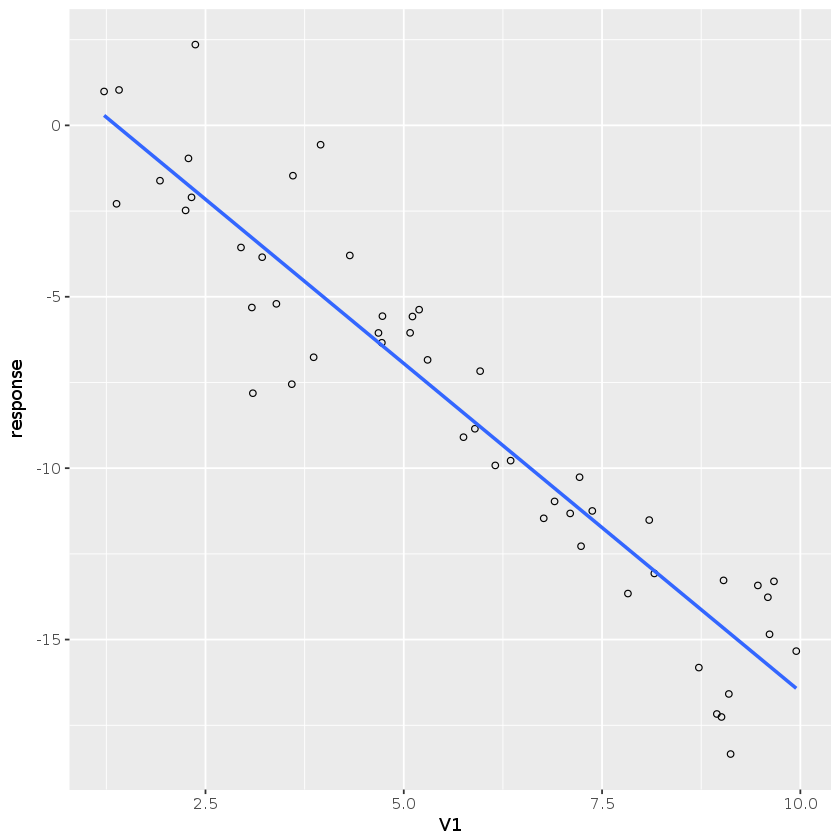

In [28]:
plot1 <- ggplot(data = df1, aes(x = V1, y = response)) + geom_point(shape=1) + geom_smooth(method=lm, se=FALSE)
plot1

# Assigment 2

# Packages

In [29]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [30]:
map_municipal <- read.csv("nld_municipal_map.csv", header = TRUE, sep=';')

head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

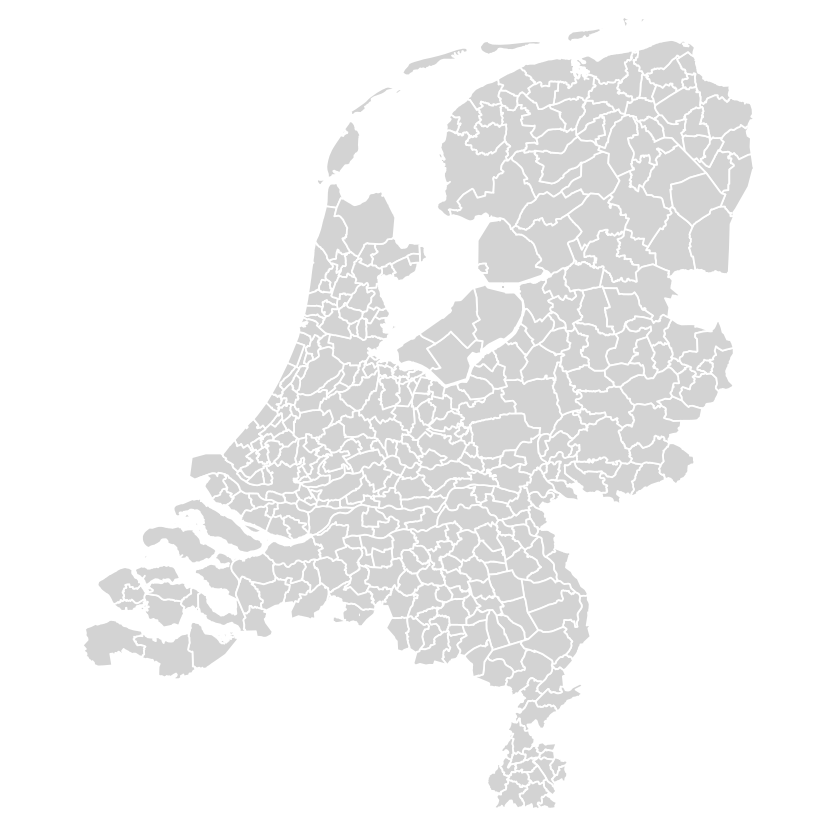

In [31]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [32]:
pc4_locations <- read.csv("nld_pc4_locations.csv", header = TRUE, sep=';')

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [33]:
schools <- read.csv("schools.csv", header = TRUE, sep=';')
head(schools)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [34]:
schools1 <- schools %>% mutate(PC4 = substr(POSTCODE,1,4)) %>% select(PC4, 'DENOMINATIE')
str(schools1)

'data.frame':	1603 obs. of  2 variables:
 $ PC4        : chr  "    " "9406" "9401" "9402" ...
 $ DENOMINATIE: Factor w/ 25 levels "                              ",..: 10 10 10 10 10 10 10 10 10 10 ...


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [35]:
school_loc <- semi_join(pc4_locations, schools1, by = 'PC4')
print(school_loc)

ERROR: Error in semi_join_impl(x, y, by$x, by$y, check_na_matches(na_matches)): Can't join on 'PC4' x 'PC4' because of incompatible types (integer / character)


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


In [36]:
AddMapLayer(MapPlot(), map_municipal) %>% 
AddPointsLayer(school_loc)

ERROR: Error in AddPointsLayer(., school_loc): object 'school_loc' not found


End of notebook